<a href="https://colab.research.google.com/github/renzotaco/datascience/blob/main/DM_MercariFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive 

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#for accessing the data file through the google drive shareable link
train=drive.CreateFile({'id':'1mN96UKMA2lcYq7vd5_MAPG9ybttjzIIM'})
train.GetContentFile('train.tsv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('train.tsv', sep='\t')
train, test = train_test_split(data, test_size=0.2, shuffle=False)
print(train.shape, test.shape)

(1186028, 8) (296507, 8)


In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(data)

Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
brand_name,632682,42.7
category_name,6327,0.4
item_description,4,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186028 entries, 0 to 1186027
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1186028 non-null  int64  
 1   name               1186028 non-null  object 
 2   item_condition_id  1186028 non-null  int64  
 3   category_name      1180953 non-null  object 
 4   brand_name         679756 non-null   object 
 5   price              1186028 non-null  float64
 6   shipping           1186028 non-null  int64  
 7   item_description   1186026 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 81.4+ MB


In [ ]:
print('There are a total of',train.shape[0],'observations in the train data.')

There are a total of 1186028 observations in the train data.


In [ ]:
train.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
train['price'].describe()

count    1.186028e+06
mean     2.672386e+01
std      3.844205e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [ ]:
price = train['price'].values
price = np.sort(price, axis=None)
print('{}th percentile value is {}'.format(90, price[int(len(price)*(float(90)/100))]))

90th percentile value is 51.0


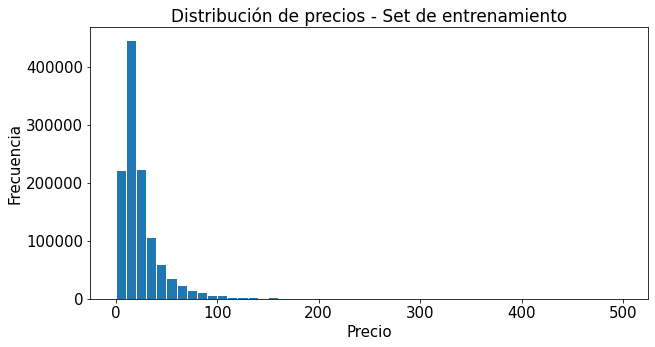

In [ ]:
train['price'].plot.hist(bins=50, figsize=(10,5), edgecolor='white',range=[0,500])
plt.xlabel('Precio', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribución de precios - Set de entrenamiento', fontsize=17)
plt.show()

In [ ]:
train['shipping'].value_counts(normalize=True)*100

0    55.267667
1    44.732333
Name: shipping, dtype: float64

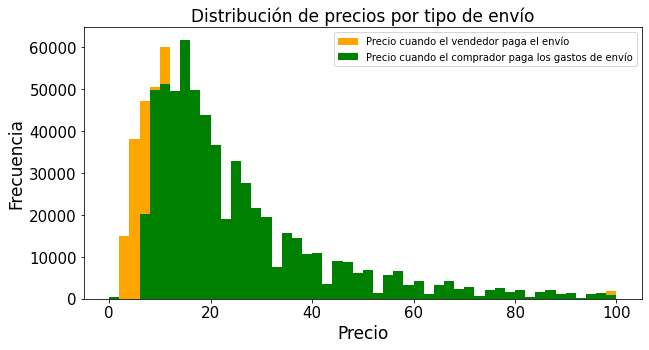

In [ ]:
shipping_fee_by_seller = train.loc[train.shipping==1, 'price']
shipping_fee_by_buyer = train.loc[train.shipping==0, 'price']

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(shipping_fee_by_seller, color='Orange', alpha=1.0, bins=50, range=[0,100], label='Precio cuando el vendedor paga el envío')
ax.hist(shipping_fee_by_buyer, color='Green', alpha=1.0, bins=50, range=[0,100], label='Precio cuando el comprador paga los gastos de envío')
ax.set(title='Comparación de histogramas', ylabel='% of Dataset in Bin')
plt.xlabel('Precio', fontsize=17)
plt.ylabel('Frecuencia', fontsize=17)
plt.title('Distribución de precios por tipo de envío', fontsize=17)
plt.tick_params(labelsize=15)
plt.legend()
plt.show()

In [ ]:
print('The median price is ${}'.format(round(shipping_fee_by_seller.median(), 2)), 'if seller pays shipping')
print('The median price is ${}'.format(round(shipping_fee_by_buyer.median(), 2)), 'if buyer pays shipping')

The median price is $14.0 if seller pays shipping
The median price is $20.0 if buyer pays shipping


In [ ]:
train['item_condition_id'].value_counts(normalize=True, sort=False)*100

1    43.194511
2    25.323264
3    29.166934
4     2.153153
5     0.162138
Name: item_condition_id, dtype: float64

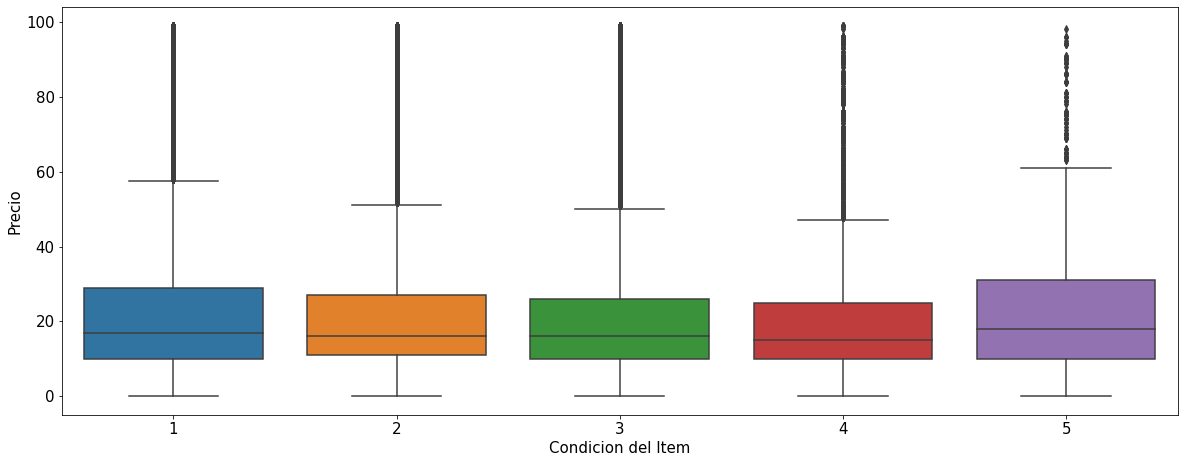

In [ ]:
price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='item_condition_id', y='price', data=price_100, ax=ax)
plt.xlabel('Condicion del Item', fontsize=15)
plt.ylabel('Precio', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
con = train[(train['item_condition_id']==5) & (train['price']>=20)]
con.head(6)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
653,653,Fossil vintage renewal purse,5,Women/Women's Handbags/Shoulder Bag,Fossil,36.0,0,No description yet
1027,1027,Broken necklace,5,Women/Jewelry/Necklaces,NaN,20.0,1,"10k gold 18"" chain. Broken at clasp."
2436,2436,Gameboy advance sp ags-101 FOR PARTS,5,Other/Other/Other,NaN,24.0,0,For parts . Turns on and hold battery charge ....
3177,3177,guitar,5,Other/Office supplies/Electronics,NaN,23.0,1,No description yet
3394,3394,iPod 1st generation 80gb,5,Electronics/Computers & Tablets/iPad/Tablet/eB...,Apple,20.0,1,For parts or repair
5055,5055,Nintendo for parts,5,Electronics/Video Games & Consoles/Consoles,NaN,20.0,0,Powers on but won't play games.


In [ ]:
(train['category_name'].value_counts(normalize=True)*100).head(15)

Women/Athletic Apparel/Pants, Tights, Leggings                 4.060365
Women/Tops & Blouses/T-Shirts                                  3.134841
Beauty/Makeup/Face                                             2.321684
Beauty/Makeup/Lips                                             2.025398
Electronics/Video Games & Consoles/Games                       1.798039
Beauty/Makeup/Eyes                                             1.720390
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    1.675511
Women/Underwear/Bras                                           1.439346
Women/Tops & Blouses/Tank, Cami                                1.381511
Women/Tops & Blouses/Blouse                                    1.374314
Women/Dresses/Above Knee, Mini                                 1.356955
Women/Jewelry/Necklaces                                        1.348572
Women/Athletic Apparel/Shorts                                  1.328419
Beauty/Makeup/Makeup Palettes                                  1

In [ ]:
print("There are %d unique main categories." % train['category_name'].nunique())

There are 1268 unique main categories.


In [ ]:
def split_cat(text):
    try: return text.split("/")
    except: return ("Category Unknown", "Category Unknown", "Category Unknown")
    
train['main_cat'], train['subcat_1'], train['subcat_2'] = zip(*train['category_name'].apply(lambda x: split_cat(x)))
test['main_cat'], test['subcat_1'], test['subcat_2'] = zip(*test['category_name'].apply(lambda x: split_cat(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [ ]:
def lowercase_categorical_features_train(feature):
    original_list = list(train[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list
  
def lowercase_categorical_features_test(feature):
    original_list = list(test[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list

In [ ]:
train['subcat_1'] = lowercase_categorical_features_train('subcat_1')
train['subcat_2'] = lowercase_categorical_features_train('subcat_2')
train['main_cat'] = lowercase_categorical_features_train('main_cat')

test['subcat_1'] = lowercase_categorical_features_test('subcat_1')
test['subcat_2'] = lowercase_categorical_features_test('subcat_2')
test['main_cat'] = lowercase_categorical_features_test('main_cat')

In [ ]:
print("There are %d unique main categories." % train['main_cat'].nunique())
print("There are %d unique first sub-categories." % train['subcat_1'].nunique())
print("There are %d unique second sub-categories." % train['subcat_2'].nunique())

There are 11 unique main categories.
There are 114 unique first sub-categories.
There are 863 unique second sub-categories.


In [ ]:
train['main_cat'].value_counts(normalize=True)*100

women                     44.805350
beauty                    14.035503
kids                      11.561784
electronics                8.265994
men                        6.311740
home                       4.595760
vintage & collectibles     3.138374
other                      3.065189
handmade                   2.083340
sports & outdoors          1.709066
category unknown           0.427899
Name: main_cat, dtype: float64

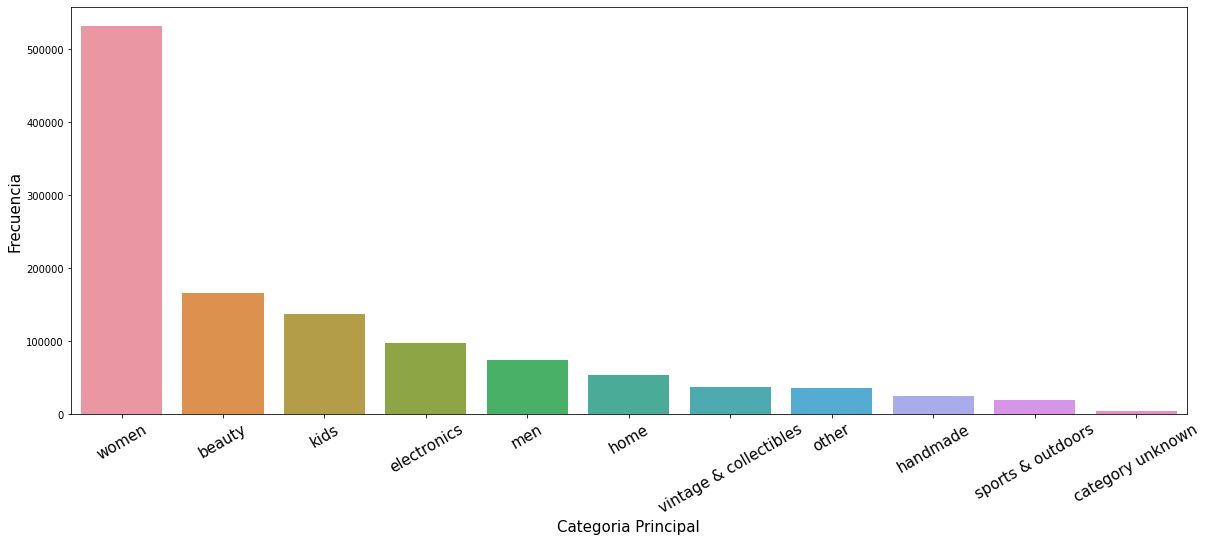

In [ ]:
fig, ax = plt.subplots(figsize=(20,7.5))
sns.countplot(train['main_cat'], ax=ax, order=(train['main_cat'].value_counts()).index)
plt.xlabel('Categoria Principal', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.show()

In [ ]:
main_cat = train.groupby('main_cat')
main_cat_median = pd.DataFrame(main_cat['price'].median())
main_cat_median = main_cat_median.sort_values(ascending=True, by='price')
main_cat_median

,price
main_cat,
handmade,12.0
kids,14.0
other,14.0
beauty,15.0
electronics,15.0
category unknown,16.0
sports & outdoors,16.0
vintage & collectibles,16.0
home,18.0


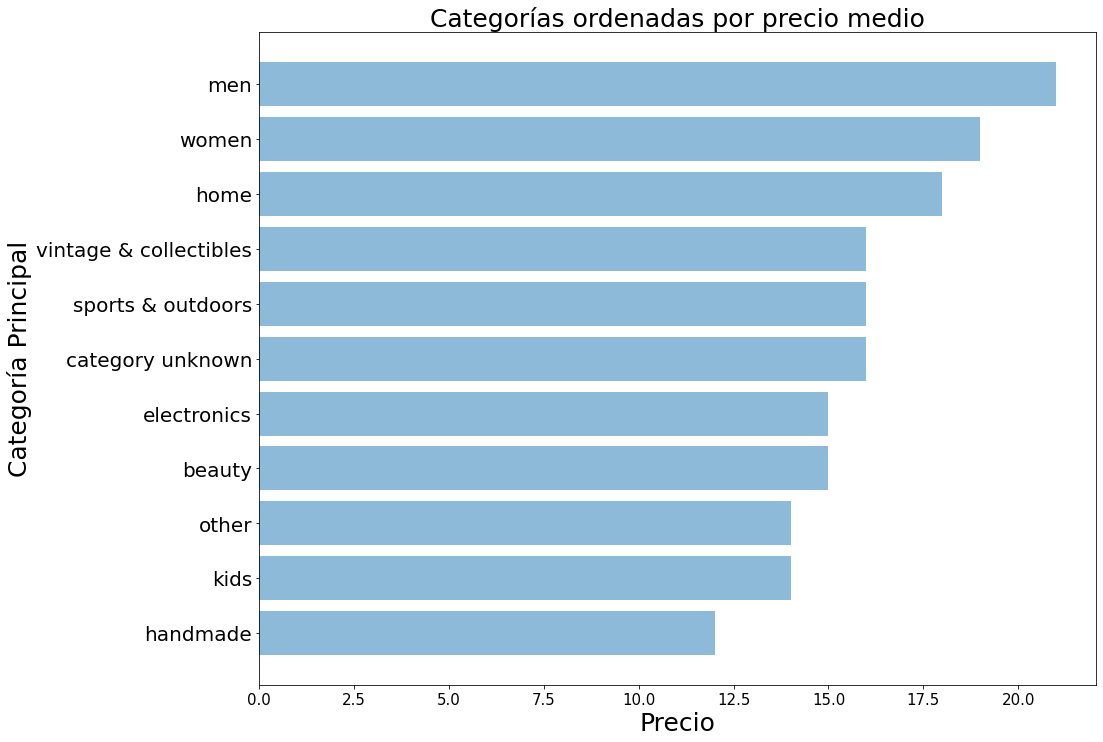

In [ ]:
plt.figure(figsize=(15,12))
plt.barh(range(0,len(main_cat_median)), main_cat_median['price'], align='center', alpha=0.5)
plt.yticks(range(0,len(main_cat_median)), main_cat_median.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Categorías ordenadas por precio medio', fontsize=25)
plt.xlabel('Precio', fontsize=25)
plt.ylabel('Categoría Principal', fontsize=25)
plt.show()

In [ ]:
train['subcat_1'].value_counts(normalize=True).head(10)

athletic apparel             0.090494
makeup                       0.084148
tops & blouses               0.072152
shoes                        0.067818
jewelry                      0.041684
toys                         0.039228
cell phones & accessories    0.035843
women's handbags             0.030885
dresses                      0.030855
women's accessories          0.028466
Name: subcat_1, dtype: float64

In [ ]:
paper = train[train['subcat_1']=='paper goods']
paper.head(6)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
442,442,Bundle for lexi,1,Handmade/Paper Goods/Sticker,NaN,7.0,1,these are handmade NEW AND IMPROVED STICKER MA...,handmade,paper goods,sticker
904,904,40 Thank you stickers,1,Handmade/Paper Goods/Sticker,NaN,3.0,1,20 smiley face 20 heart stickers You will rece...,handmade,paper goods,sticker
1127,1127,Ohio state deer antler decal,1,Handmade/Paper Goods/Sticker,NaN,7.0,0,Vinyl decal comes with high quality transfer t...,handmade,paper goods,sticker
1318,1318,10 Cricut Explore Pens,1,Handmade/Paper Goods/Scrapbooking,NaN,21.0,0,10 Cricut Pens- 2 packages! For Cricut Explore...,handmade,paper goods,scrapbooking
1329,1329,Tumblr Stickers: read description,1,Handmade/Paper Goods/Sticker,NaN,3.0,1,These are the stickers I have left besides the...,handmade,paper goods,sticker
1436,1436,Probably whiskey vinyl decal sticker,1,Handmade/Paper Goods/Sticker,NaN,9.0,0,"The size is 3"" leave me a message on a color. ...",handmade,paper goods,sticker


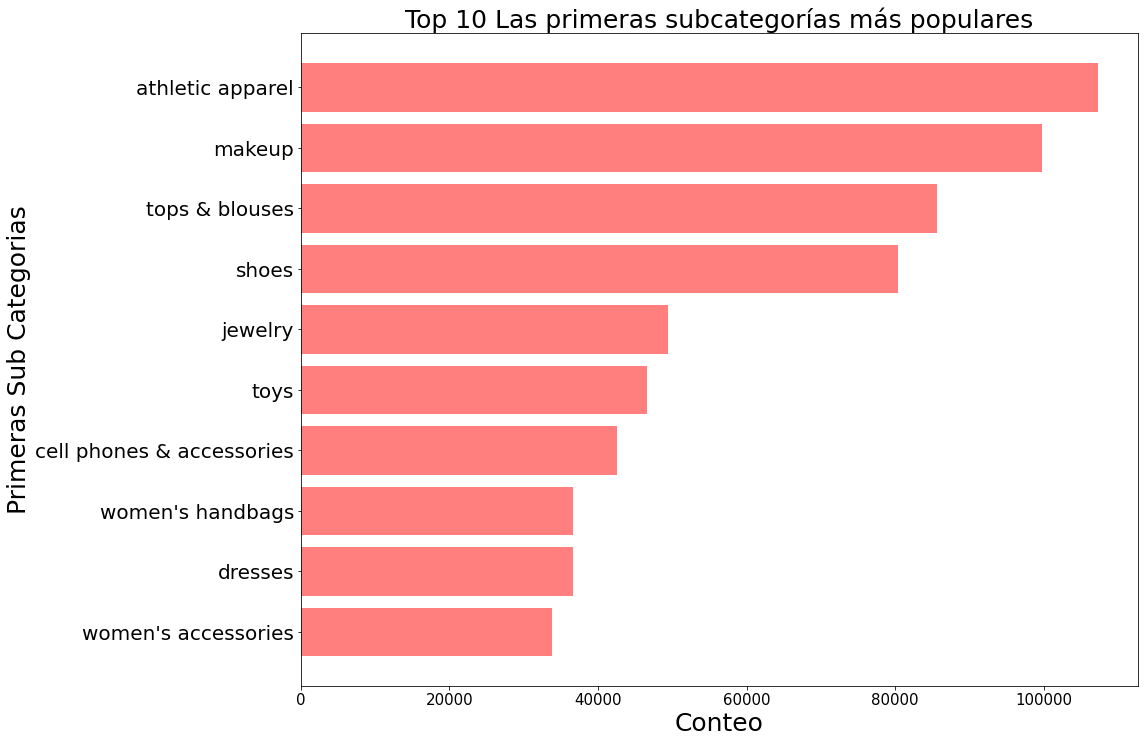

In [ ]:
x = train['subcat_1'].value_counts().index[:10]
y = train['subcat_1'].value_counts().values[:10]

plt.figure(figsize=(15,12))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='red')
plt.yticks(range(len(x),0,-1), x, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Las primeras subcategorías más populares', fontsize=25)
plt.xlabel('Conteo', fontsize=25)
plt.ylabel('Primeras Sub Categorias', fontsize=25)
plt.show()

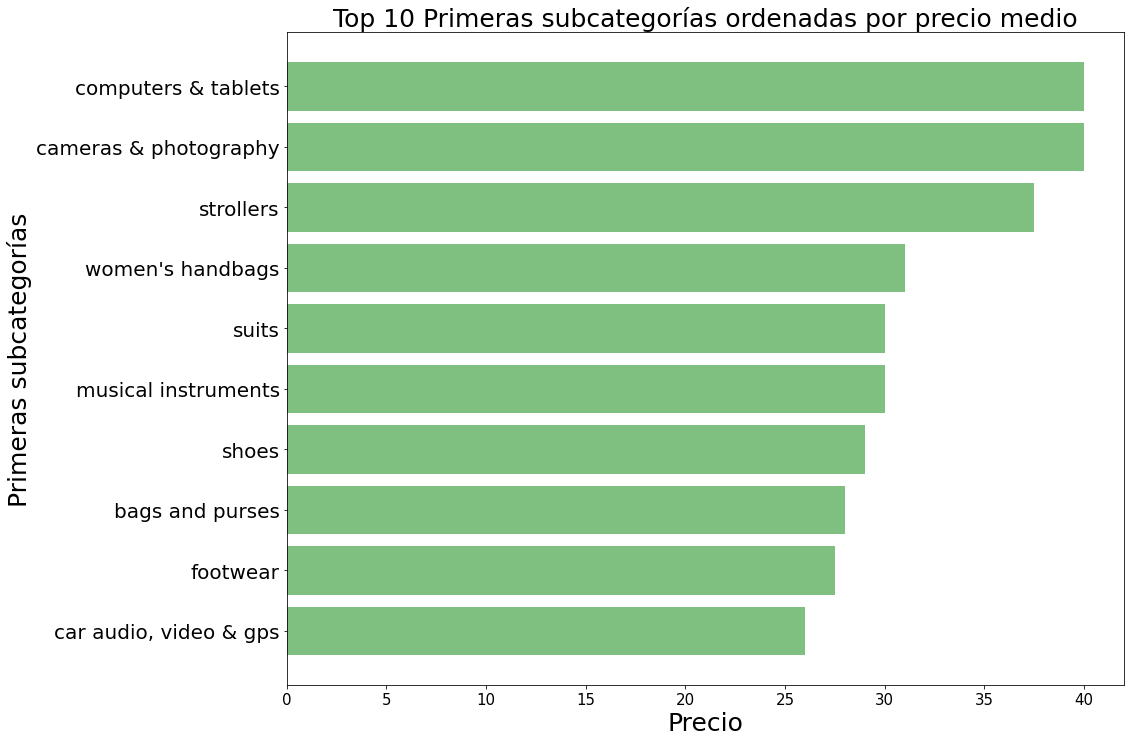

In [ ]:
subcat_1 = train.groupby('subcat_1')
subcat_1_median = pd.DataFrame(subcat_1['price'].median())
subcat_1_median = subcat_1_median.sort_values(ascending=True, by='price')
subcat_1_median_top = subcat_1_median[-10:]
subcat_1_median_bottom = subcat_1_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(subcat_1_median_top)), subcat_1_median_top['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(0,len(subcat_1_median_top)), subcat_1_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Primeras subcategorías ordenadas por precio medio', fontsize=25)
plt.xlabel('Precio', fontsize=25)
plt.ylabel('Primeras subcategorías', fontsize=25)
plt.show()

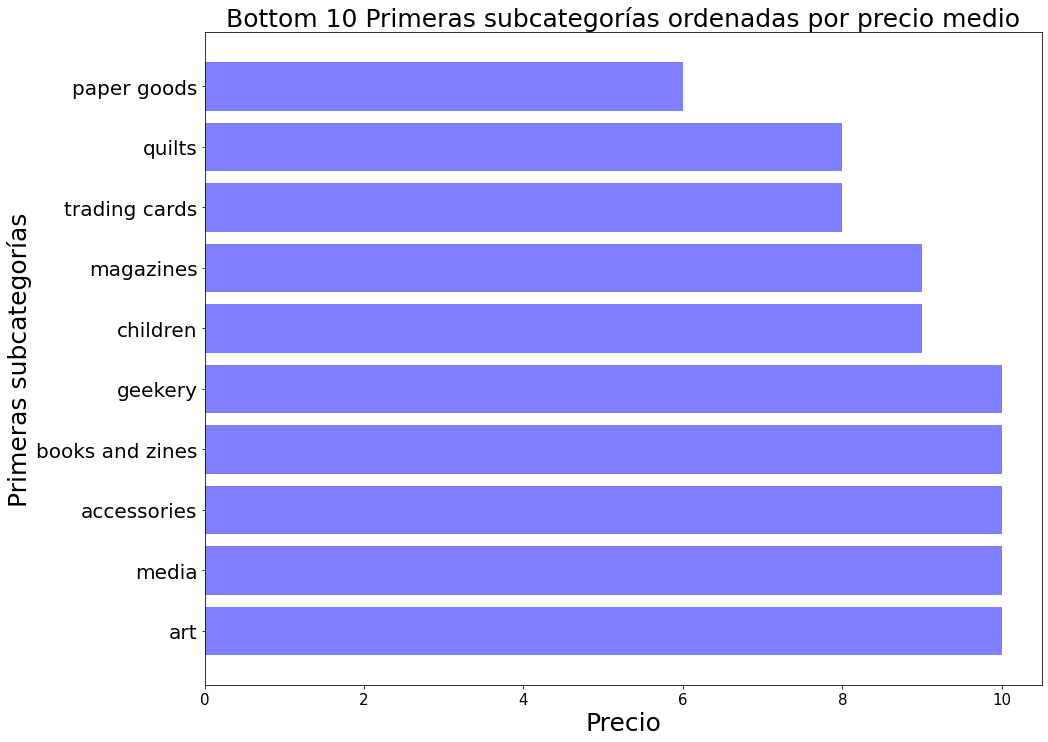

In [ ]:
plt.figure(figsize=(15,12))
plt.barh(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom['price'], align='center', alpha=0.5, color='blue')
plt.yticks(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Bottom 10 Primeras subcategorías ordenadas por precio medio', fontsize=25)
plt.xlabel('Precio', fontsize=25)
plt.ylabel('Primeras subcategorías', fontsize=25)
plt.show()

In [ ]:
stand = train[train['subcat_2']=='Standard']
stand

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2


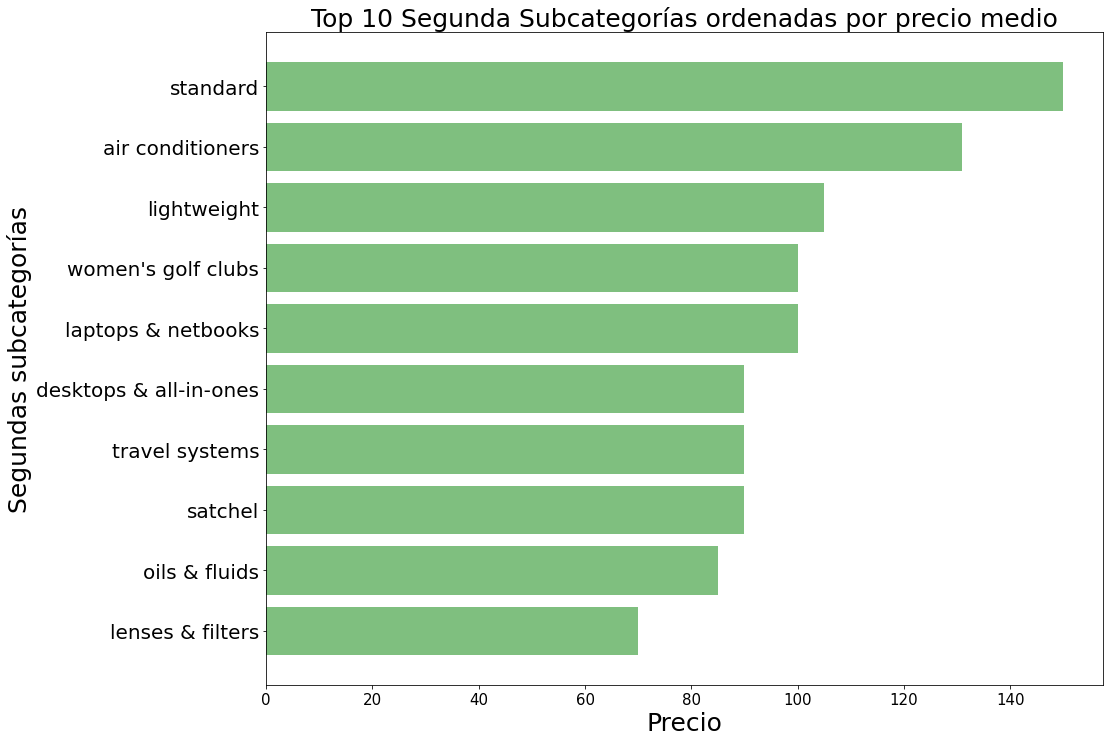

In [ ]:
subcat_2 = train.groupby('subcat_2')
subcat_2_median = pd.DataFrame(subcat_2['price'].median())
subcat_2_median = subcat_2_median.sort_values(ascending=True, by='price')
subcat_2_median_top = subcat_2_median[-10:]
subcat_2_median_bottom = subcat_2_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(subcat_2_median_top)), subcat_2_median_top['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(0,len(subcat_2_median_top)), subcat_2_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Segunda Subcategorías ordenadas por precio medio', fontsize=25)
plt.xlabel('Precio', fontsize=25)
plt.ylabel('Segundas subcategorías', fontsize=25)
plt.show()

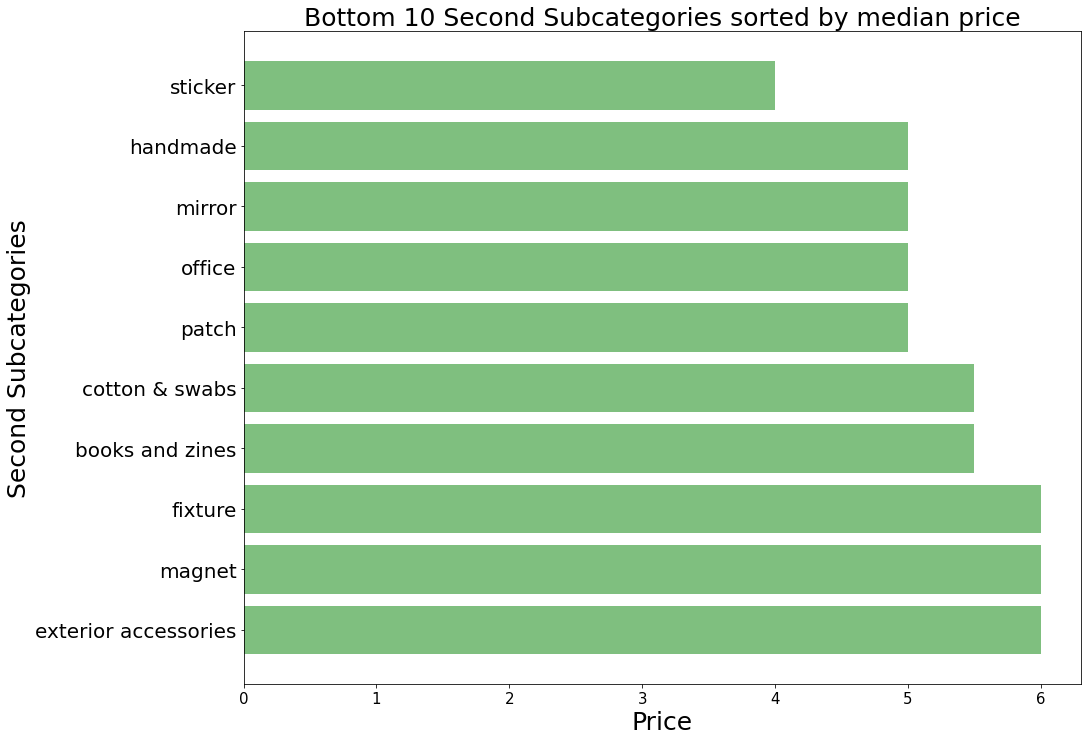

In [ ]:
plt.figure(figsize=(15,12))
plt.barh(range(len(subcat_2_median_bottom),0,-1), subcat_2_median_bottom['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(len(subcat_2_median_bottom),0,-1), subcat_2_median_bottom.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Bottom 10 Second Subcategories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Second Subcategories', fontsize=25)
plt.show()

In [ ]:
(train['brand_name'].value_counts(normalize=True)*100).head(10)

Nike                 6.368903
PINK                 6.358017
Victoria's Secret    5.679832
LuLaRoe              3.636158
Apple                2.032494
FOREVER 21           1.785641
Nintendo             1.781816
Lululemon            1.708848
Michael Kors         1.641766
American Eagle       1.571593
Name: brand_name, dtype: float64

In [ ]:
print('There are', train['brand_name'].nunique(), 'unique brands in the data')

There are 4535 unique brands in the data


In [ ]:
train['brand_name'] = train['brand_name'].fillna('brand_unavailable')
brand = list(train['brand_name'].values)
brand_name_given = []
for i in brand:
    if i=='brand_unavailable':
        brand_name_given.append('No')
    else:
        brand_name_given.append('Yes')
        
train['brand_name_given'] = brand_name_given   

test['brand_name'] = test['brand_name'].fillna('brand_unavailable')
brand = list(test['brand_name'].values)
brand_name_given = []
for i in brand:
    if i=='brand_unavailable':
        brand_name_given.append('No')
    else:
        brand_name_given.append('Yes')
        
test['brand_name_given'] = brand_name_given

In [ ]:
train['brand_name'] = lowercase_categorical_features_train('brand_name')
test['brand_name'] = lowercase_categorical_features_test('brand_name')

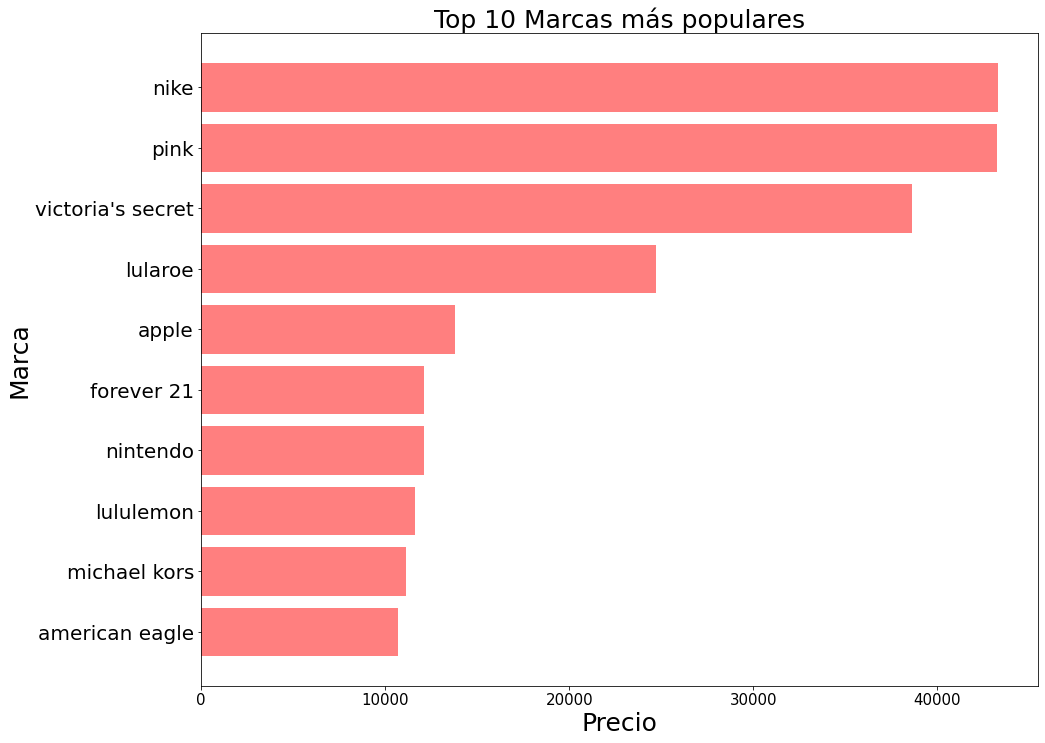

In [ ]:
brand_filled = train[train['brand_name']!='brand_unavailable']

x = brand_filled['brand_name'].value_counts().index[:10]
y = brand_filled['brand_name'].value_counts().values[:10]

plt.figure(figsize=(15,12))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='red')
plt.yticks(range(len(x),0,-1), x, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Marcas más populares', fontsize=25)
plt.xlabel('Precio', fontsize=25)
plt.ylabel('Marca', fontsize=25)
plt.show()

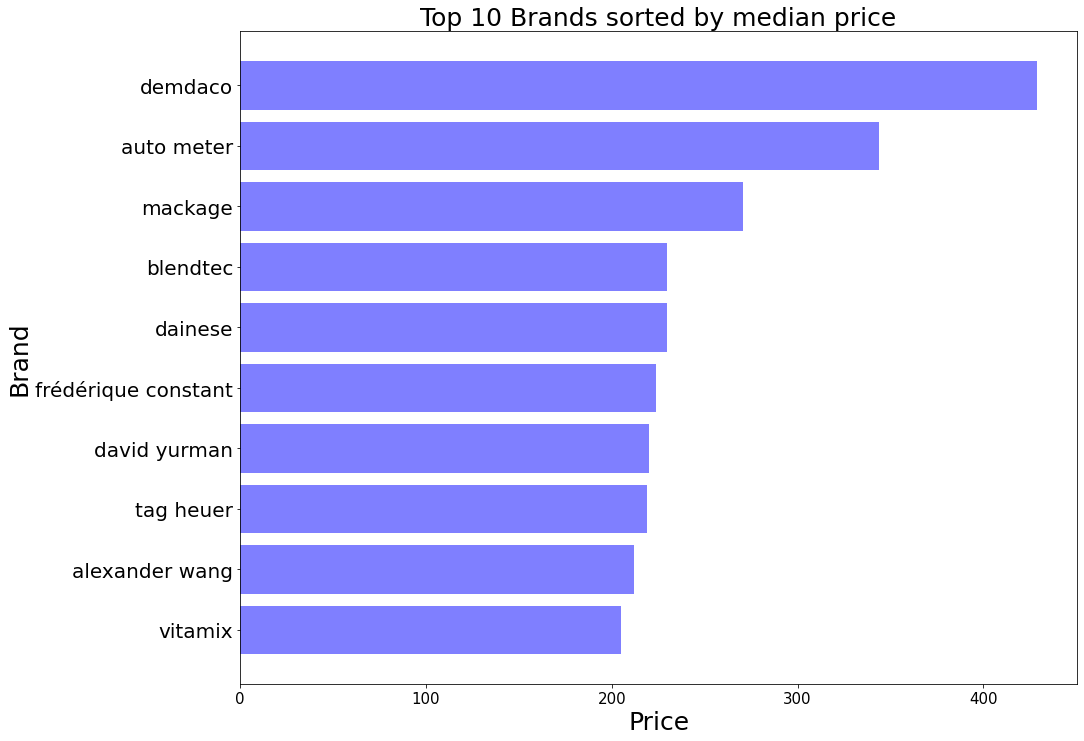

In [ ]:
brand = train.groupby('brand_name')
brand_median = pd.DataFrame(brand['price'].median())
brand_median = brand_median.sort_values(ascending=True, by='price')
brand_median_top = brand_median[-10:]
brand_median_bottom = brand_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(brand_median_top)), brand_median_top['price'], align='center', alpha=0.5, color='blue')
plt.yticks(range(0,len(brand_median_top)), brand_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Brands sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Brand', fontsize=25)
plt.show()

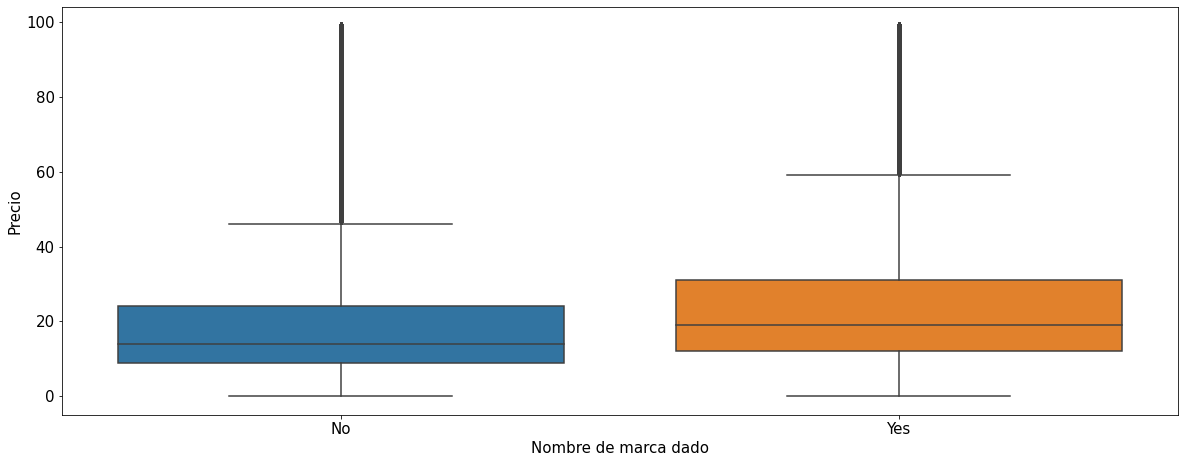

In [ ]:
price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='brand_name_given', y='price', data=price_100, ax=ax)
plt.xlabel('Nombre de marca dado', fontsize=15)
plt.ylabel('Precio', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
brand_given = train.groupby('brand_name_given')
brand_given_median = pd.DataFrame(brand_given['price'].describe())
brand_given_median

,count,mean,std,min,25%,50%,75%,max
brand_name_given,,,,,,,,
No,506272.0,21.108840,27.085329,0.0,9.0,14.0,24.0,1999.0
Yes,679756.0,30.905851,44.621451,0.0,12.0,20.0,34.0,2009.0


In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
from tqdm import tqdm
preprocessed_description = []
# tqdm is for printing the status bar
for description in tqdm(train['item_description'].values):
    sent = decontracted(str(description))
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_description.append(sent.lower().strip())

100%|██████████| 1186028/1186028 [01:58<00:00, 10012.15it/s]


In [ ]:
train['clean_description'] = preprocessed_description

In [ ]:
from tqdm import tqdm
preprocessed_description = []
# tqdm is for printing the status bar
for description in tqdm(test['item_description'].values):
    sent = decontracted(str(description))
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_description.append(sent.lower().strip())
    
test['clean_description'] = preprocessed_description

100%|██████████| 296507/296507 [00:29<00:00, 9890.04it/s]


In [ ]:
no_desc = train[train['item_description']=='No description yet']
print((no_desc.shape[0]/train.shape[0])*100)

5.570273214460367


In [ ]:
quantile = pd.qcut(train['price'], 4, labels=['first_q', 'second_q', 'third_q', 'fourth_q'])
price_q = list(quantile)
train['price_q'] = price_q

price_first_quantile = train[train['price_q']=='first_q']
price_second_quantile = train[train['price_q']=='second_q']
price_third_quantile = train[train['price_q']=='third_q']
price_fourth_quantile = train[train['price_q']=='fourth_q']

print(price_first_quantile.shape, price_second_quantile.shape, price_third_quantile.shape, price_fourth_quantile.shape)

(301057, 14) (303105, 14) (287683, 14) (294183, 14)


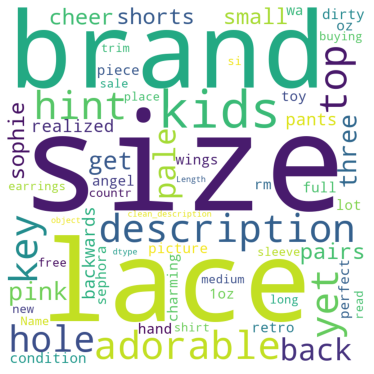

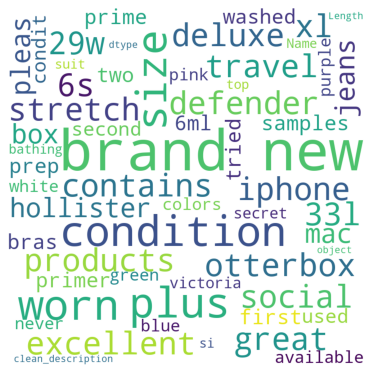

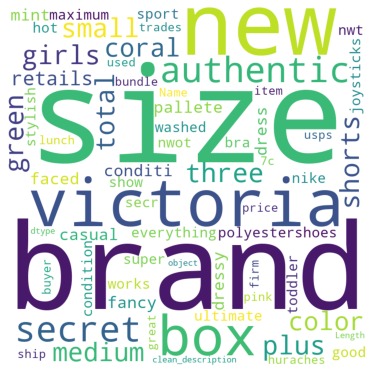

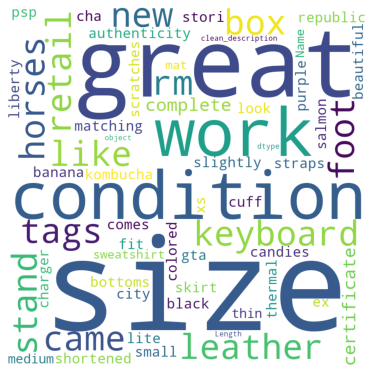

In [ ]:
wordcloud_1 = WordCloud(width=800, height=800, background_color='white',stopwords=stopwords,max_words=300, min_font_size=10).generate(''.join(str(price_first_quantile['clean_description'])))
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud_1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

wordcloud_2 = WordCloud(width=800, height=800, background_color='white',stopwords=stopwords,max_words=300, min_font_size=10).generate(''.join(str(price_second_quantile['clean_description'])))
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud_2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

wordcloud_3 = WordCloud(width=800, height=800, background_color='white',stopwords=stopwords,max_words=300, min_font_size=10).generate(''.join(str(price_third_quantile['clean_description'])))
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud_3)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

wordcloud_4 = WordCloud(width=800, height=800, background_color='white',stopwords=stopwords,max_words=300, min_font_size=10).generate(''.join(str(price_fourth_quantile['clean_description'])))
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud_4)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
item_description = list(train['item_description'].values)
description_availability = []
for i in item_description:
    if i=='No description yet':
        description_availability.append('No')
    else:
        description_availability.append('Yes')
        
train['description_given'] = description_availability      

item_description = list(test['item_description'].values)
description_availability = []
for i in item_description:
    if i=='No description yet':
        description_availability.append('No')
    else:
        description_availability.append('Yes')
        
test['description_given'] = description_availability

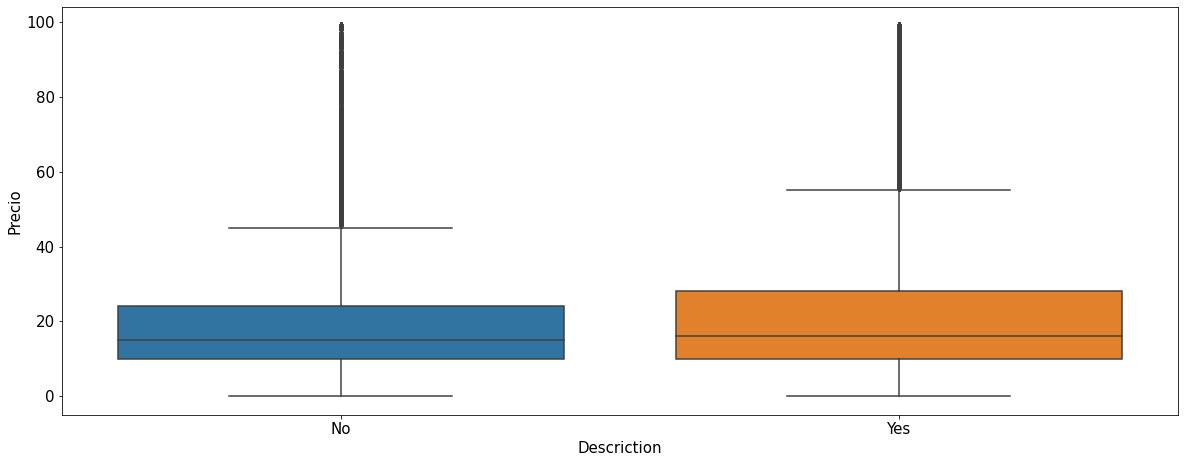

In [ ]:
price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='description_given', y='price', data=price_100, ax=ax)
plt.xlabel('Descriction', fontsize=15)
plt.ylabel('Precio', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
desc_given = train.groupby('description_given')
desc_given_median = pd.DataFrame(desc_given['price'].describe())
desc_given_median

,count,mean,std,min,25%,50%,75%,max
description_given,,,,,,,,
No,66065.0,21.946409,29.950927,0.0,10.0,15.0,25.0,1506.0
Yes,1119963.0,27.005680,38.866737,0.0,10.0,17.0,30.0,2009.0


In [ ]:
print(train.shape, test.shape)

(1186028, 15) (296507, 14)


In [ ]:
#save the train and test data to pickle files to preserve the operations done till now and for further use during modelling
train.to_pickle('mercari_train')
test.to_pickle('mercari_test')

In [ ]:
x_train, x_test = train.drop(['price'], axis=1), test.drop(['price'], axis=1)
y_train, y_test = train['price'], test['price']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encoding(feature):
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_onehot = encoder.fit_transform(x_train[feature].values.reshape(-1,1))
    x_test_onehot = encoder.transform(x_test[feature].values.reshape(-1,1))
    return x_train_onehot, x_test_onehot
  
x_train_condition, x_test_condition = onehot_encoding('item_condition_id')
print(x_train_condition.shape, x_test_condition.shape)

(1186028, 5) (296507, 5)


In [ ]:
x_train_brand, x_test_brand = onehot_encoding('brand_name')
x_train_brand_given, x_test_brand_given = onehot_encoding('brand_name_given')
x_train_condition, x_test_condition = onehot_encoding('item_condition_id')
x_train_shipping, x_test_shipping = onehot_encoding('shipping')
x_train_main_cat, x_test_main_cat = onehot_encoding('main_cat')
x_train_subcat_1, x_test_subcat_1 = onehot_encoding('subcat_1')
x_train_subcat_2, x_test_subcat_2 = onehot_encoding('subcat_2')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(min_df=10, ngram_range=(1,2), binary=True)
x_train_bow_desc = bow.fit_transform(x_train['clean_description'])
x_test_bow_desc = bow.transform(x_test['clean_description'])

features_list.extend(bow.get_feature_names())
##len(features_list)

NameError: ignored

In [ ]:
from scipy.sparse import hstack
x_train_final = hstack((x_train_brand, x_train_brand_given, x_train_condition, x_train_shipping, x_train_main_cat, x_train_subcat_1, x_train_subcat_2, x_train_bow_desc))
x_test_final = hstack((x_test_brand, x_test_brand_given, x_test_condition, x_test_shipping, x_test_main_cat, x_test_subcat_1, x_test_subcat_2, x_test_bow_desc))

print(x_train_final.shape, x_test_final.shape)

(1186028, 270603) (296507, 270603)


In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

y_train_mean = y_train_log.mean() #for baseline prediction

from sklearn.metrics import mean_squared_error
def rmsle(y_test, y_pred):  
    return (np.sqrt(((y_test-y_pred)**2).mean())).round(4)
    return result
  
baseline_result = rmsle(y_test_log, y_train_mean)
baseline_result

0.7497

In [ ]:
y_train_log = np.log1p(y_train)

In [ ]:
from sklearn.metrics import mean_squared_log_error
def get_rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

LR = SGDRegressor(loss='squared_loss', random_state=42)
alpha = [10**i for i in range(-7,2)]
params = {'alpha':alpha}
RS_LR = RandomizedSearchCV(LR, params, scoring='neg_mean_squared_error', cv=4, n_jobs=-1, random_state=42)
RS_LR.fit(x_train_final, y_train_log)
RS_LR.best_params_

{'alpha': 1e-07}

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_log_error
LR = SGDRegressor(loss='squared_loss', alpha=1e-07, random_state=42)
LR.fit(x_train_final, y_train_log)
y_pred_lr = LR.predict(x_test_final)

lr_error = rmsle(y_test_log, y_pred_lr)
lr_error

0.517

In [ ]:
SVR = SGDRegressor(loss='epsilon_insensitive', random_state=42)
alpha = [10**i for i in range(-7,2)]
params = {'alpha':alpha}
RS_SVR = RandomizedSearchCV(SVR, params, scoring='neg_mean_squared_error', cv=4, n_jobs=-1, random_state=42)
RS_SVR.fit(x_train_final, y_train_log)
RS_SVR.best_params_

{'alpha': 1e-06}

In [ ]:
SVR = SGDRegressor(loss='epsilon_insensitive', alpha=1e-04, random_state=42)
SVR.fit(x_train_final, y_train_log)
y_pred_svr = SVR.predict(x_test_final)

svr_error = rmsle(y_test_log, y_pred_svr)
svr_error

0.5179

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBRegressor(random_state=42)
max_depth = [2,4,7,10]
n_estimators = [5,10,25,50,100]
params = {'n_estimators':n_estimators, 'max_depth':max_depth}
RS_XGB = RandomizedSearchCV(XGB, params, scoring='neg_mean_squared_error', cv=4, n_jobs=-1, random_state=42)
RS_XGB.fit(x_train_final, y_train_log)
RS_XGB.best_params_

[18:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'max_depth': 10, 'n_estimators': 50}